In [24]:
from csd import CSD
from csd.typings import CSDConfiguration, Backends, RunConfiguration, MeasuringTypes
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, minimize_scalar
from typing import List

In [49]:
valid_backends = [
    Backends.FOCK,
    Backends.GAUSSIAN,
    Backends.TENSORFLOW,
]

alphas = list(np.arange(0.0, 2.1, 0.1))
# alphas = [0.7]

In [3]:
def prob_homodyne(a: float) -> float:
    return (1 + math.erf(math.sqrt(2) * a))/2

In [4]:
def prob_helstrom(a: float) -> float:
    return (1 + math.sqrt(1 - math.exp(-4*a**2)))/2

In [50]:
p_homos = [prob_homodyne(a=current_alpha) for current_alpha in alphas]

In [51]:
p_hels = [prob_helstrom(a=current_alpha) for current_alpha in alphas]

In [7]:
def p_zero(a: float) -> float:
    value = math.exp(-a**2)
    return value

In [8]:
def p_err(b:float, a: float) -> float:
    return (p_zero(-a+b) + 1 - p_zero(a+b))/2

In [9]:
def p_succ(b:float, a:float) -> float:
    return (p_zero(a+b) + 1 - p_zero(-a+b))/2

In [10]:
def optimize(alphas: list[float]) -> list[float]:
    return [minimize(p_err, 0, args=(alpha,), method='BFGS', tol=1e-6).x[0] for alpha in alphas]

In [52]:
opt_betas = optimize(alphas=alphas)

In [53]:
p_ken_op = [p_succ(b=opt_beta, a=alpha) for (opt_beta, alpha) in zip(opt_betas, alphas)]

In [54]:
run_configuration = RunConfiguration({
        'alphas': alphas,
        'backend': Backends.FOCK,
        'number_qumodes': 1,
        'number_layers': 1,
        'measuring_type': MeasuringTypes.PROBABILITIES,
        'codeword_size': 10,
        'cutoff_dim': 2
    })

In [55]:
csd_fock_prob_result = CSD().execute(configuration=run_configuration)

[CSD] 0.0.1|DEBUG|2021-10-12 11:56:20]: Executing One Layer circuit with Backend: fock,  with measuring_type: probabilities
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:20]: Optimizing for alpha: 0.0
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:20]: Optimizing for alpha: 0.1
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:20]: Optimizing for alpha: 0.2
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:20]: Optimizing for alpha: 0.30000000000000004
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:20]: Optimizing for alpha: 0.4
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:20]: Optimizing for alpha: 0.5
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:20]: Optimizing for alpha: 0.6000000000000001
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:21]: Optimizing for alpha: 0.7000000000000001
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:21]: Optimizing for alpha: 0.8
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:21]: Optimizing for alpha: 0.9
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:21]: Optimizing for alpha: 1.0
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:21]: Optimizing for alpha: 1.1
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:21]

In [56]:
run_configuration = RunConfiguration({
        'alphas': alphas,
        'backend': Backends.GAUSSIAN,
        'number_qumodes': 1,
        'number_layers': 1,
        'measuring_type': MeasuringTypes.PROBABILITIES,
        'codeword_size': 10,
        'cutoff_dim': 2
    })

In [57]:
csd_gauss_prob_result = CSD().execute(configuration=run_configuration)

[CSD] 0.0.1|DEBUG|2021-10-12 11:56:26]: Executing One Layer circuit with Backend: gaussian,  with measuring_type: probabilities
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:26]: Optimizing for alpha: 0.0
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:26]: Optimizing for alpha: 0.1
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:26]: Optimizing for alpha: 0.2
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:26]: Optimizing for alpha: 0.30000000000000004
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:26]: Optimizing for alpha: 0.4
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:27]: Optimizing for alpha: 0.5
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:27]: Optimizing for alpha: 0.6000000000000001
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:27]: Optimizing for alpha: 0.7000000000000001
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:27]: Optimizing for alpha: 0.8
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:27]: Optimizing for alpha: 0.9
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:27]: Optimizing for alpha: 1.0
[CSD] 0.0.1|DEBUG|2021-10-12 11:56:28]: Optimizing for alpha: 1.1
[CSD] 0.0.1|DEBUG|2021-10-12 11:56

In [60]:
run_configuration = RunConfiguration({
        'alphas': alphas,
        'backend': Backends.TENSORFLOW,
        'number_qumodes': 1,
        'number_layers': 1,
        'measuring_type': MeasuringTypes.PROBABILITIES,
        'codeword_size': 10,
        'cutoff_dim': 2
    })

In [61]:
csd_tf_prob_result = CSD().execute(configuration=run_configuration)

[CSD] 0.0.1|DEBUG|2021-10-12 11:57:27]: Executing One Layer circuit with Backend: tf,  with measuring_type: probabilities
[CSD] 0.0.1|DEBUG|2021-10-12 11:57:27]: Optimizing for alpha: 0.0
[CSD] 0.0.1|DEBUG|2021-10-12 11:57:27]: Optimizing for alpha: 0.1
[CSD] 0.0.1|DEBUG|2021-10-12 11:57:27]: Optimizing for alpha: 0.2
[CSD] 0.0.1|DEBUG|2021-10-12 11:57:27]: Optimizing for alpha: 0.30000000000000004
[CSD] 0.0.1|DEBUG|2021-10-12 11:57:27]: Optimizing for alpha: 0.4
[CSD] 0.0.1|DEBUG|2021-10-12 11:57:27]: Optimizing for alpha: 0.5
[CSD] 0.0.1|DEBUG|2021-10-12 11:57:27]: Optimizing for alpha: 0.6000000000000001
[CSD] 0.0.1|DEBUG|2021-10-12 11:57:27]: Optimizing for alpha: 0.7000000000000001
[CSD] 0.0.1|DEBUG|2021-10-12 11:57:27]: Optimizing for alpha: 0.8
[CSD] 0.0.1|DEBUG|2021-10-12 11:57:27]: Optimizing for alpha: 0.9
[CSD] 0.0.1|DEBUG|2021-10-12 11:57:27]: Optimizing for alpha: 1.0
[CSD] 0.0.1|DEBUG|2021-10-12 11:57:27]: Optimizing for alpha: 1.1
[CSD] 0.0.1|DEBUG|2021-10-12 11:57:27]: 

In [68]:
run_configuration = RunConfiguration({
        'alphas': alphas,
        'backend': Backends.FOCK,
        'number_qumodes': 1,
        'number_layers': 1,
        'measuring_type': MeasuringTypes.SAMPLING,
        'shots': 10,
        'codeword_size': 10,
        'cutoff_dim': 2
    })

In [69]:
csd_fock_sampling_result = CSD().execute(configuration=run_configuration)

[CSD] 0.0.1|DEBUG|2021-10-12 12:02:17]: Executing One Layer circuit with Backend: fock,  with measuring_type: sampling
[CSD] 0.0.1|DEBUG|2021-10-12 12:02:17]: Optimizing for alpha: 0.0
[CSD] 0.0.1|DEBUG|2021-10-12 12:02:18]: Optimizing for alpha: 0.1
[CSD] 0.0.1|DEBUG|2021-10-12 12:02:18]: Optimizing for alpha: 0.2
[CSD] 0.0.1|DEBUG|2021-10-12 12:02:21]: Optimizing for alpha: 0.30000000000000004
[CSD] 0.0.1|DEBUG|2021-10-12 12:02:24]: Optimizing for alpha: 0.4
[CSD] 0.0.1|DEBUG|2021-10-12 12:02:27]: Optimizing for alpha: 0.5
[CSD] 0.0.1|DEBUG|2021-10-12 12:02:31]: Optimizing for alpha: 0.6000000000000001
[CSD] 0.0.1|DEBUG|2021-10-12 12:02:35]: Optimizing for alpha: 0.7000000000000001
[CSD] 0.0.1|DEBUG|2021-10-12 12:02:39]: Optimizing for alpha: 0.8
[CSD] 0.0.1|DEBUG|2021-10-12 12:02:43]: Optimizing for alpha: 0.9
[CSD] 0.0.1|DEBUG|2021-10-12 12:02:47]: Optimizing for alpha: 1.0
[CSD] 0.0.1|DEBUG|2021-10-12 12:02:50]: Optimizing for alpha: 1.1
[CSD] 0.0.1|DEBUG|2021-10-12 12:02:54]: Opt

In [70]:
run_configuration = RunConfiguration({
        'alphas': alphas,
        'backend': Backends.TENSORFLOW,
        'number_qumodes': 1,
        'number_layers': 1,
        'measuring_type': MeasuringTypes.SAMPLING,
        'shots': 10,
        'codeword_size': 10,
        'cutoff_dim': 2
    })

In [71]:
csd_tf_sampling_result = CSD().execute(configuration=run_configuration)

[CSD] 0.0.1|DEBUG|2021-10-12 12:03:25]: Executing One Layer circuit with Backend: tf,  with measuring_type: sampling
[CSD] 0.0.1|DEBUG|2021-10-12 12:03:25]: Optimizing for alpha: 0.0
[CSD] 0.0.1|DEBUG|2021-10-12 12:03:26]: Optimizing for alpha: 0.1
[CSD] 0.0.1|DEBUG|2021-10-12 12:03:50]: Optimizing for alpha: 0.2
[CSD] 0.0.1|DEBUG|2021-10-12 12:03:56]: Optimizing for alpha: 0.30000000000000004
[CSD] 0.0.1|DEBUG|2021-10-12 12:04:20]: Optimizing for alpha: 0.4
[CSD] 0.0.1|DEBUG|2021-10-12 12:04:40]: Optimizing for alpha: 0.5
[CSD] 0.0.1|DEBUG|2021-10-12 12:04:40]: Optimizing for alpha: 0.6000000000000001
[CSD] 0.0.1|DEBUG|2021-10-12 12:05:02]: Optimizing for alpha: 0.7000000000000001
[CSD] 0.0.1|DEBUG|2021-10-12 12:05:26]: Optimizing for alpha: 0.8
[CSD] 0.0.1|DEBUG|2021-10-12 12:05:46]: Optimizing for alpha: 0.9
[CSD] 0.0.1|DEBUG|2021-10-12 12:06:04]: Optimizing for alpha: 1.0
[CSD] 0.0.1|DEBUG|2021-10-12 12:06:05]: Optimizing for alpha: 1.1
[CSD] 0.0.1|DEBUG|2021-10-12 12:06:05]: Optim

In [66]:
def plot_succ_prob(alphas: List[float], probs: List[List[float]], labels: List[str]):
    fig, ax = plt.subplots(figsize=[10, 7])
    for prob, label in zip(probs, labels):
        ax.plot(alphas, prob, label=label)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.show()

In [72]:
probs = [p_homos, p_ken_op, p_hels, 
         csd_fock_prob_result['p_succ'],
         csd_gauss_prob_result['p_succ'],
         csd_tf_prob_result['p_succ'],
         csd_fock_sampling_result['p_succ'],
         csd_tf_sampling_result['p_succ'],
         ]
labels = ["pHom(a)", "pKenOp(a)", "pHel(a)",
          "pFockProb(a)",
          "pGausProb(a)",
          "pTFProb(a)",
          "pFockSampl(a)",
          "pTFSampl(a)"
         ]

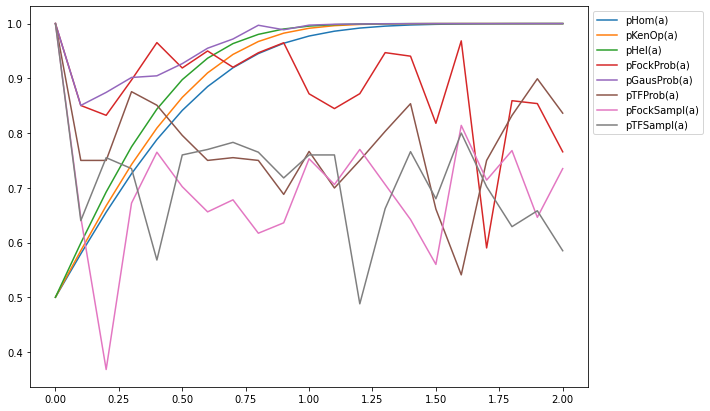

In [73]:
plot_succ_prob(alphas=alphas,
               probs=probs,
               labels=labels)

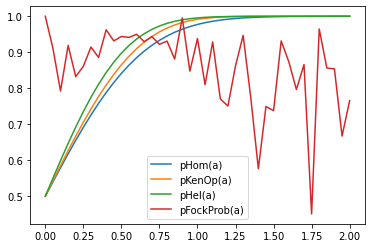

In [18]:
plt.plot(alphas, p_homos, label="pHom(a)")  # Plot the chart
plt.plot(alphas, p_ken_op, label="pKenOp(a)")
plt.plot(alphas, p_hels, label="pHel(a)")
plt.plot(alphas, csd_fock_prob_result['p_succ'], label="pFockProb(a)")
plt.legend()
plt.show() 

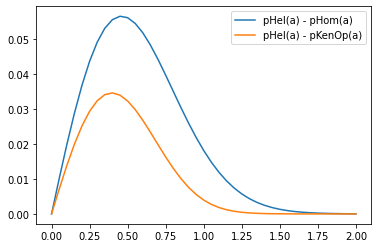

In [77]:
plt.plot(alphas, list(np.array(p_hels)-np.array(p_homos)), label="pHel(a) - pHom(a)")
plt.plot(alphas, list(np.array(p_hels)-np.array(p_ken_op)), label="pHel(a) - pKenOp(a)")
plt.legend()
plt.show()